# Table of Contents
1. [Introduction](#1.-Introduction)

    1.1. [Objectives](#1.1.-Objectives)
    
    1.2. [Features](#1.2.-Features)
    
2. [Packages, data loading and cleaning](#2.-Packages,-data-loading-and-cleaning)

    2.1. [Packages](#2.1.-Packages)
    
    2.2. [Data loading](#2.2.-Data-loading)
    
    2.3. [Data cleaning](#2.3.-Data-cleaning)
 
3. [Descriptive analysis](#3.-Descriptive-analysis)

    3.1. [Categories](#3.1.-Categories)
    
    3.2. [Numbers](#3.2.-Numbers)
    
    3.3. [Booleans](#3.3.-Booleans)
    
    3.4. [Descriptive analysis conclusions and considerations.](#3.4.-Descriptive-analysis-conclusions-and-considerations.)

4. [Data Analysis and EDA](#4.-Data-Analysis-and-EDA)
    
    4.1. [Overlaped histograms](#4.1.-Overlaped-histograms)
    
    4.2. [Barplots](#4.2.-Barplots)
    
5. [Model-based feature selection.](#5.-Model-based-feature-selection.)

6. [Decision Tree](#6.-Decision-Tree)

    6.1. [Resampling](#6.1.-Resampling)
    
    6.2. [Tree model](#6.2.-Tree-model)
    
    

# 1. Introduction

publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

A model that predicts whether a consumer will pay or not could help companies distribute its their resources better. If the companies have a borrower profile, they can, for example, allocate their best debt collectors to each case. They can also come up with paying strategies that could help the borrower pay the debt.

In this kernel, we are going to determine relevant factors that determine whether a borrower will pay a debt or not, then create a borrower profile and finally conlcude and make recommendations to better the business.

## 1.1. Objectives
- Find relevant factors that influence whether a borrower will pay or not.
- Build a model that predicts wheter the borrower will pay or not.
- Create a consumer profile of borrowers that pay or not.
- Make conclusions and reccomendations to improve bussiness operations.

## 1.2. Features

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# 2. Packages, data loading and cleaning

## 2.1. Packages

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Data viz
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
sns.set_style('whitegrid')

# preprocessing
from sklearn.feature_selection import RFE

# Ml model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import plot_confusion_matrix

# over-sampling
from imblearn.over_sampling import RandomOverSampler

# Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

np.warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'graphviz'

## 2.2. Data loading

In [2]:
loan = pd.read_csv('../input/loan-data/loan_data.csv')
display(loan)
display(loan.describe())

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## 2.3. Data cleaning
In this step we are going to eliminate duplicates and examine Nulls values and see if they can be discarted as well. It might be possible that the cleaning process extend itself until the descriptive analysis, where is possible that suspicious data comes up.

We are also going to take a look at the data types and modify them if they are inconsistent.

### Data types

In [3]:
display(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


None

We could leave the datatypes like that since a boolean could also be interpreted as a boolean. But, tu ease the algorithm in the descritive section we are going to convert "credit policy" and "not.fully.paid" to booleans. The remaining features are all in order.

In [4]:
loan["credit.policy"] = loan["credit.policy"].astype("bool")
loan["not.fully.paid"] = loan["not.fully.paid"].astype("bool")
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   bool   
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   bool   
dtypes: bool(2), float64(6), int64(5), object(1)
memory usage: 916.8+ KB
None


### Duplicates

In [5]:
loan.drop_duplicates(inplace=True)

### Null's
Before dropping the null's let's frst check how they are distributed with a heatmap

<AxesSubplot:>

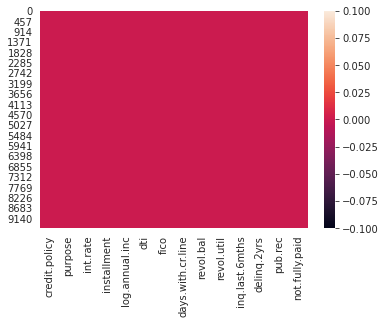

In [6]:
sns.heatmap(loan.isnull())

The heatmap doesn't show any null value. We can then continue with the descriptive analysis.

# 3. Descriptive analysis

We know from section 2.3. that most of the features are numeric, having only one categorical and two booleans, one of which being our target variable which is our target variable. This makes our descriptive analysis quite easy since we only have to graph histograms corresponding to the numeric values, a bar plot for the categorical feature an another barplot for the boolean.

## 3.1. Categories

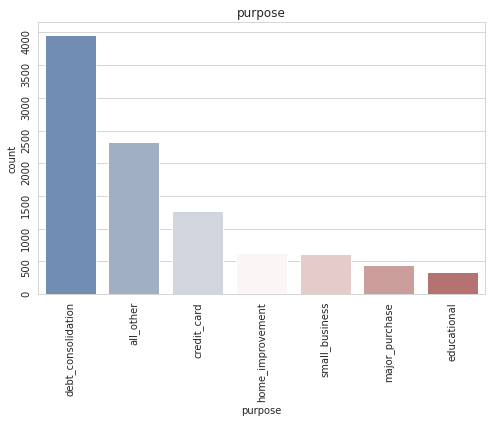

,count,%
debt_consolidation,3957,41.31
all_other,2331,24.34
credit_card,1262,13.18
home_improvement,629,6.57
small_business,619,6.46
major_purchase,437,4.56
educational,343,3.58


In [7]:
fig, ax = plt.subplots(figsize=(8,5))

cat = loan.select_dtypes('object').columns

order = list(loan[cat[0]].value_counts().keys())
sns.countplot(cat[0], data=loan, palette="vlag", order=order)
ax.tick_params(labelrotation=90)
ax.set_title(cat[0])

plt.show()

table = pd.DataFrame(loan[cat[0]].value_counts())
table.rename(columns={'purpose':'count'}, inplace=True)
table['%'] = np.round((table['count']/table['count'].sum()) * 100, 2)
table

From the descriptive analysis we can see that most of the borrowers are for debt consolidation (41.31%). The least category is educational. It is too soon to start concluding, but my intuition tells me that the categories with the most borrowers are also the ones with a bigger proportion of paid debt, as educational sits at the bottom having students with the least amount of money. We will wait though until the analysis part where we are going to analyse further.

## 3.2. Numbers

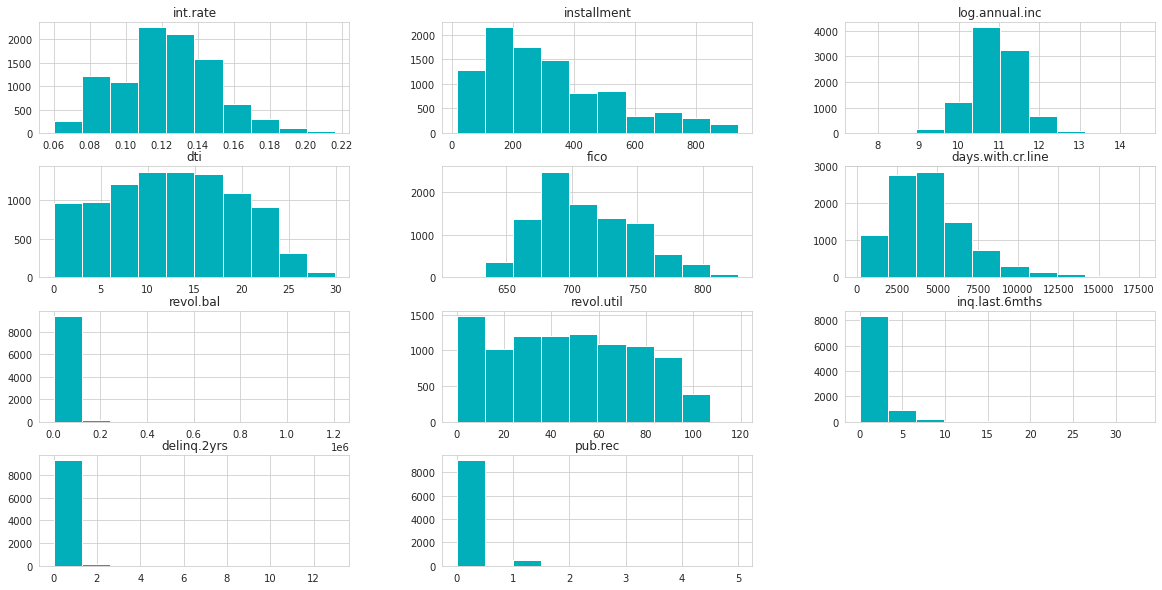

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


In [8]:
numbers = loan.select_dtypes(['int64', 'float64']).columns
loan[numbers].hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()

loan[numbers].describe()

We can see that most of the histograms follow a normal distribution, except for revol.bal, which, from the descriptive stats, know that have some very extreme values, this could be fixed by removing the outiler or applyieng a log formula such as:

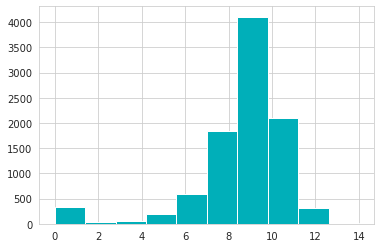

In [9]:
TotalLog = np.log(loan['revol.bal'] + 1)
TotalLog.hist(color='#00afb9')

plt.show()

With the log formula, the graph looks more 'normal'. We are going to take into account both method when building the ML model.

Regarding 'delinq.2yrs' and 'pub.rec', these are distributions that have their values distributed through 4-5 values. They behave like a cateforical value but they are not. A count plot could give us a better representation of these distributions

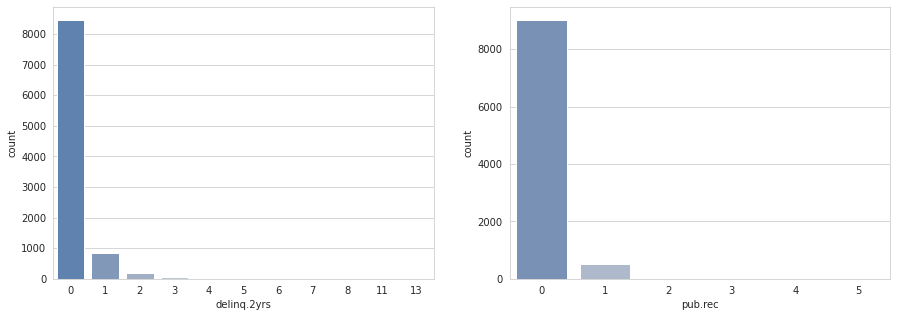

0     8458
1      832
2      192
3       65
4       19
5        6
6        2
8        1
11       1
13       1
7        1
Name: delinq.2yrs, dtype: int64

 0    9019
1     533
2      19
3       5
4       1
5       1
Name: pub.rec, dtype: int64


In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

inte = ['delinq.2yrs', 'pub.rec']

sns.countplot(inte[0], data=loan, ax=ax[0], palette="vlag")
sns.countplot(inte[1], data=loan, ax=ax[1], palette="vlag")

plt.show()

print(loan[inte[0]].value_counts())
print('\n', loan[inte[1]].value_counts())

We can see that both distributions have some extreme values, after the data analysis, when building the ML model, we are to consider getting rid of them

## 3.3. Booleans

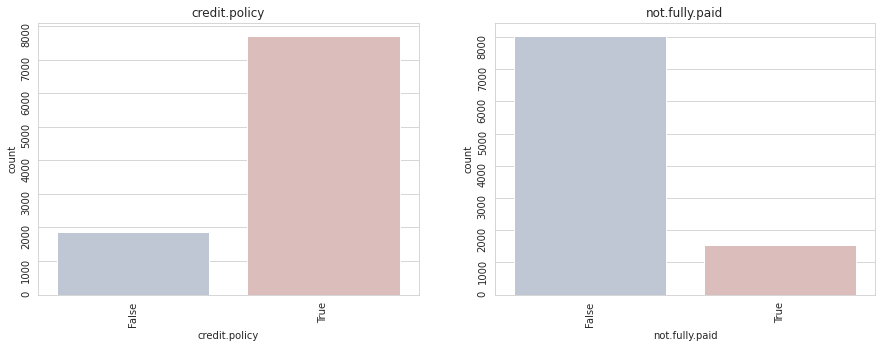

True     7710
False    1868
Name: credit.policy, dtype: int64

 False    8045
True     1533
Name: not.fully.paid, dtype: int64


In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

boole = list(loan.select_dtypes(['bool']).columns)

sns.countplot(boole[0], data=loan, ax=ax[0], palette="vlag")
ax[0].tick_params(labelrotation=90)
ax[0].set_title(boole[0])

sns.countplot(boole[1], data=loan, ax=ax[1], palette="vlag")
ax[1].tick_params(labelrotation=90)
ax[1].set_title(boole[1])
               
plt.show()

print(loan[boole[0]].value_counts())
print('\n', loan[boole[1]].value_counts())

we have a case of inbalanced data that could be a problem for the ML model since most of are false. When building the model, we are going to apply sampling technique to deal with the imbalanced data.

## 3.4. Descriptive analysis conclusions and considerations.

- 'revol.bal' is rich in outliers. for the ML model, we might take the outliers out or apply a log formula.
- 'delinq.2yrs' and 'pub.rec' are also rich in outliers. Since they are integers, i don't think a log formula would be wise, It's better to take out the outliers for the ML model.
- 'not.fully.paid', the target variable'is highly imbalanced. After the data analysis and before the ML model, I'm going to use a sampling technique to deal with this case.

# 4. Data Analysis and EDA

Since our target variable is a boolean, we are going to plot the 6 scatter plots with the highest correlations and hue them with the target variable, this will be more as a visual analysis. If we don't find any pattern, I'm going to apply a model-based feature selection to reduce the number of features and analyze the most relevants for the model.

'Purpose' is a categorical variable, so a barplot will do.

'inq.last.6mths', 'delinq.2yrs' and 'pub.rec'describbe the number of times something happened, a barplot will also work on these cases.

## 4.1. Overlaped histograms

<AxesSubplot:xlabel='int.rate', ylabel='Count'>

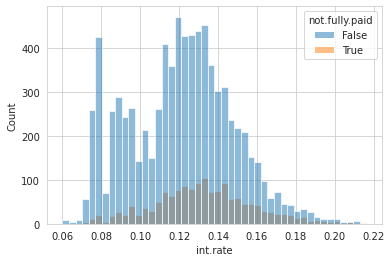

In [12]:
numbers = loan.select_dtypes(['int64', 'float64']).columns
numbers = numbers[:-3]

sns.histplot(data=loan, x=numbers[0], hue='not.fully.paid')

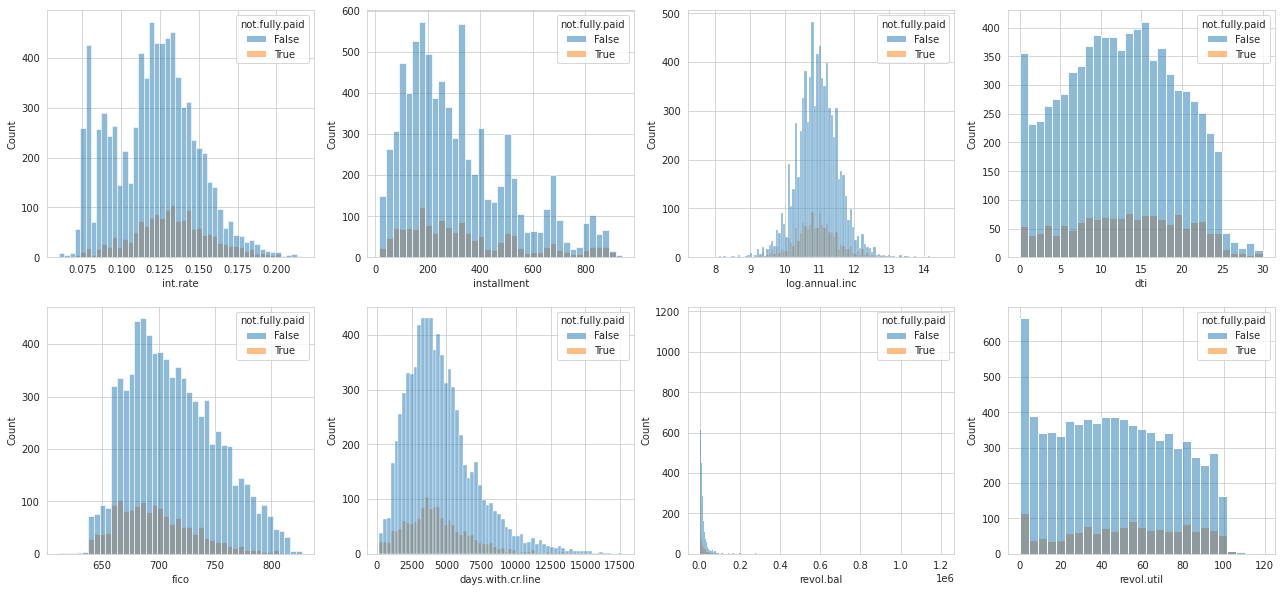

In [13]:
fig, ax = plt.subplots(2,4, figsize=(22,10))
ax=ax.ravel()

count=0
for i in numbers:
    sns.histplot(data=loan, x=i, hue='not.fully.paid', ax=ax[count])
    count+=1

Unfortunately, both distributions have the same shape but in a different proportion, looking for a pattern here will be difficult. Let's group our target variable by these variables and see how the mean and standard deviation differ.

In [14]:
loan.groupby('not.fully.paid')[numbers].agg(['mean', 'std'])

int.rate           installment             log.annual.inc  \
                    mean       std        mean         std           mean   
not.fully.paid                                                              
False           0.120770  0.026692  314.574123  203.398688      10.941091   
True            0.132452  0.025495  342.785114  223.948527      10.885023   

                                dti                  fico             \
                     std       mean       std        mean        std   
not.fully.paid                                                         
False           0.604045  12.494413  6.855020  713.326911  38.223723   
True            0.666718  13.195838  7.006769  697.828441  33.756808   

               days.with.cr.line                  revol.bal                \
                            mean          std          mean           std   
not.fully.paid                                                              
False                4592.632624  2508.035500  16122.724425  29637.645740   
True                 4393.541259  2431.785491  21066.293542  49905.689359   

               revol.util             
                     mean        std  
not.fully.paid                        
False           45.759608  28.891285  
True            52.255075  29.057906

As expected, they do not differ a lot. The only concluson we can get here is that our target variable is almost equally distributed in each feature. Therefore, there's no relevant pattern for our model.

## 4.2. Barplots

['inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'credit.policy']


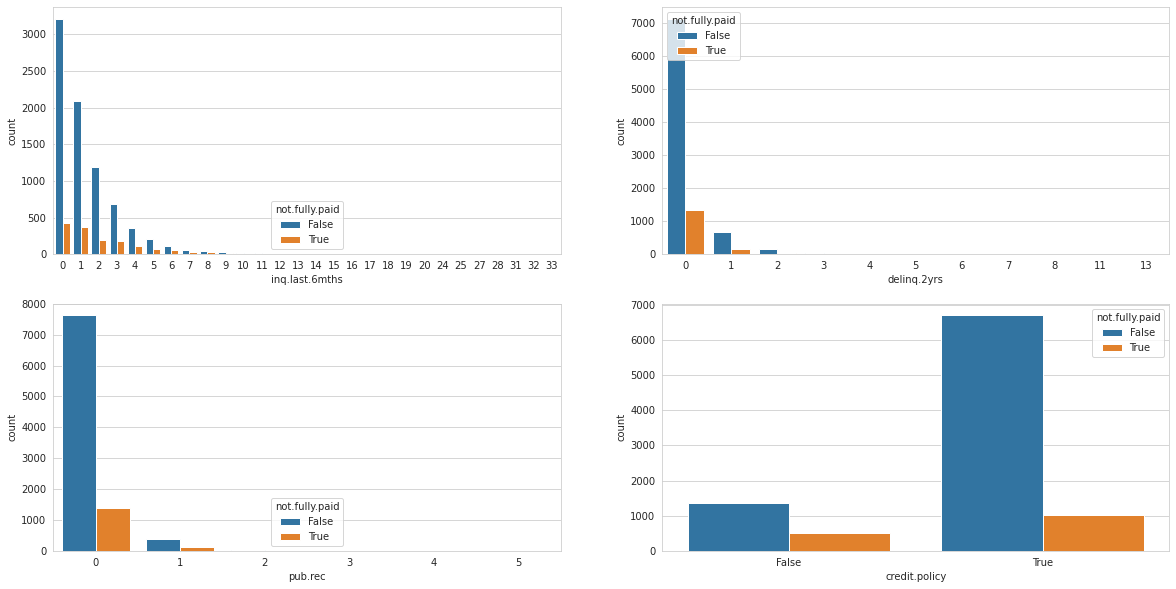

In [15]:
# Features to graph
numbers = loan.select_dtypes(['int64', 'float64']).columns
numbers = list(numbers[-3:])
numbers.append("credit.policy")
print(numbers)

# Viz
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax=ax.ravel()

count=0
for i in numbers:
    sns.countplot(x=i, data=loan, hue='not.fully.paid', ax=ax[count])
    count+=1

plt.show()

No relevant insights as well. Let's try and apply a model-based feature selection and let the algorithm show us what is not visible to the eye.

# 5. Model-based feature selection.

Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. For this case, we are going to use a random forest classifier, since it usually yields good results without having to normalize the features. Let's take a look.

In [16]:
# Ml values
numbers = loan.select_dtypes(['int64', 'float64', 'bool']).columns

X = loan[numbers].iloc[:,:-1].values
y = loan.iloc[:,-1].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
for i in range(1,13):

    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

    select.fit(X_train, y_train)

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

    print("Test score: {:.3f}".format(score), " number of features: {}".format(i))

Test score: 0.741  number of features: 1
Test score: 0.818  number of features: 2
Test score: 0.835  number of features: 3
Test score: 0.835  number of features: 4
Test score: 0.838  number of features: 5
Test score: 0.841  number of features: 6
Test score: 0.838  number of features: 7
Test score: 0.838  number of features: 8
Test score: 0.837  number of features: 9
Test score: 0.838  number of features: 10
Test score: 0.838  number of features: 11
Test score: 0.837  number of features: 12


There's not much difference between test scores. I'm going to choose 5 features and see what the algorithm chooses.

In [18]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=5)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(5))

features = pd.DataFrame({'features':list(loan[numbers].iloc[:,:-1].columns), 'select':list(mask)})
display(features.T)
features = list(features[features['select']==True]['features'])
print("The selected features are: " "\n")
display(features)


Test score: 0.838  number of features: 5


,0,1,2,3,4,5,6,7,8,9,10,11
features,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
select,False,False,True,False,True,False,True,True,True,False,False,False


The selected features are: 



['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']

We have our working features, let's add the target variable 'not.fully.paid' and proceed aplying a decision tree. Then, I'm going to keep mining and graph the model to see if i can finally find the pattern.

In [19]:
features.append('not.fully.paid')

print("Working dataset", "\n")
loan[features]

Working dataset 



,installment,dti,days.with.cr.line,revol.bal,revol.util,not.fully.paid
0,829.10,19.48,5639.958333,28854,52.1,False
1,228.22,14.29,2760.000000,33623,76.7,False
2,366.86,11.63,4710.000000,3511,25.6,False
3,162.34,8.10,2699.958333,33667,73.2,False
4,102.92,14.97,4066.000000,4740,39.5,False
...,...,...,...,...,...,...
9573,344.76,10.39,10474.000000,215372,82.1,True
9574,257.70,0.21,4380.000000,184,1.1,True
9575,97.81,13.09,3450.041667,10036,82.9,True
9576,351.58,19.18,1800.000000,0,3.2,True


# 6. Decision Tree

## 6.1. Resampling
We know from section 3.4 that our data is highly imbalanced, let's apply a resampling algorithm before normalizing the dataset. For this case, I'm going to apply a random oversampling algorithm, this will create synthethic data in the minority class.

In [20]:
loan_ros = loan[features]
print("Data before over-sampling")
print(loan_ros['not.fully.paid'].value_counts(), "\n")



Data before over-sampling
False    8045
True     1533
Name: not.fully.paid, dtype: int64 



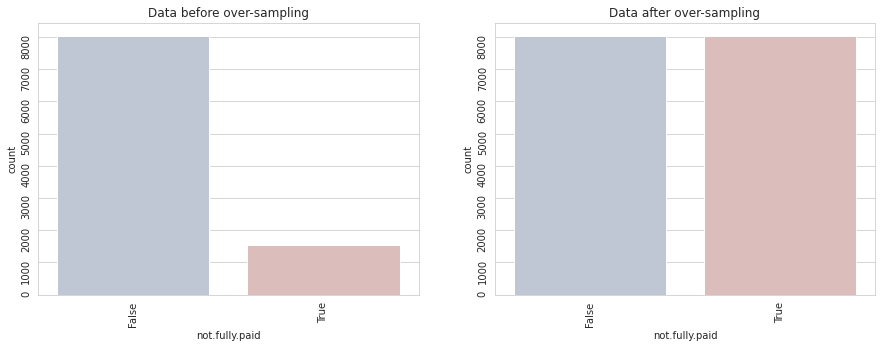

Data before over-sampling
False    8045
True     1533
Name: not.fully.paid, dtype: int64 

Data after over-sampling
False    8045
True     8045
Name: not.fully.paid, dtype: int64


In [21]:
# over-sampling
loan_ros = loan[features]
X = loan_ros.iloc[:,:-1]
y = loan_ros.iloc[:,-1]

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

loan_ros = x_ros
loan_ros['not.fully.paid'] = y_ros


#visualazing samples
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot('not.fully.paid', data=loan, ax=ax[0], palette="vlag")
ax[0].tick_params(labelrotation=90)
ax[0].set_title("Data before over-sampling")

sns.countplot('not.fully.paid', data=loan_ros, ax=ax[1], palette="vlag")
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Data after over-sampling")

plt.show()

print("Data before over-sampling")
print(loan['not.fully.paid'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_ros['not.fully.paid'].value_counts())

With balanced data, we can go ahead and build the model. Let's first check the distributions with the newly balanced data.

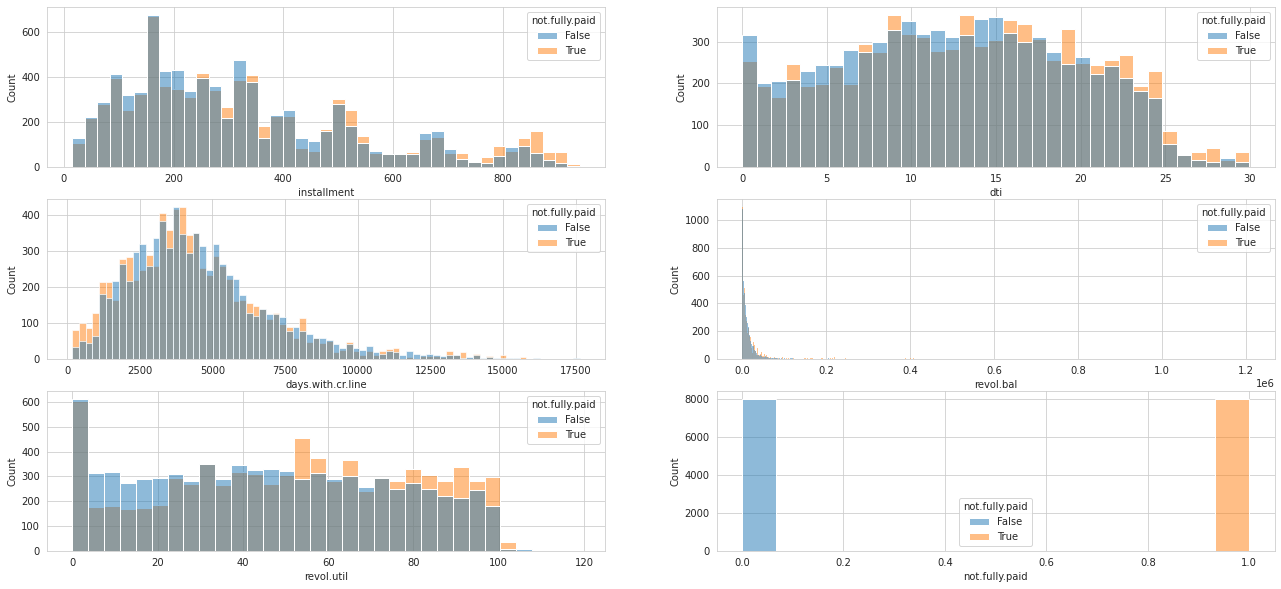

In [22]:
fig, ax = plt.subplots(3,2, figsize=(22,10))
ax=ax.ravel()

count=0
for i in loan_ros.keys():
    sns.histplot(data=loan_ros, x=i, hue='not.fully.paid', ax=ax[count])
    count+=1

not a pattern yet, lets see what the model tells us.

## 6.2. Tree model

Accuracy on training set : 0.757
Accuracy on test set : 0.702 



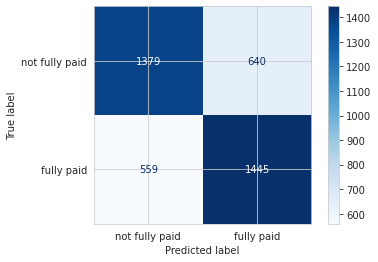

[[1379  640]
 [ 559 1445]] 

Feature importances: 
[0.22807276 0.18140467 0.2387935  0.20038809 0.15134099]


In [23]:
# Selecting training values
loan_model = loan_ros
X = loan_model.iloc[:,:-1].values
y = loan_model.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Building the model


tree = DecisionTreeClassifier(max_depth=12, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set : {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test, y_test)), "\n")


# Confusion matrix
disp = plot_confusion_matrix(tree, X_test, y_test,
                             cmap=plt.cm.Blues, display_labels=["not fully paid", "fully paid"])
plt.show()

print(disp.confusion_matrix, "\n")

print("Feature importances: ")
print(tree.feature_importances_)

We have achieved an acceptable score and confussion matrix. The feature importances shows why is so difficult to find a pattern in the data, all of the features have similar importance, which means that the model is a combination of fine tunnings from all of the features. Is hard to create a client profile given these features. But the algorithm can be useful when the bank operator enters the data in the system, the algorithm will tell the agents how probable it is for the client to fully pay or not.

# 7. Conclusions
- We couldn't find any obervable pattern. The data the target variable is equally distributed in all the variables. It almost looks as if the dataset in synthetic.
- Nevertheless, The the algorithm was able to reach a decent and more real test score (working with the imbalanced data would have yield a better but not real result), and was able to classify both outcomes of the target variable in the confusion matrix.
- We couldn't meet the objective of creating a cliente profile, but the algorith could be use by agents to see how probable it is a client will pay or not, easing the decision process. 